<a href="https://colab.research.google.com/github/Vixuz144/Robin-Hood/blob/main/Robin_Hood_bosque_uniforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulación

1. El primer paso es definir las variables que intervienen en el problema.

* $X, Y ∼ U[-l,l]$

Donde $l$ es la mitan de la longitud del lado de un cuadrado.

Además, se considerarán que todos los radios de los árboles son constantes, para nuestro ejemplo consideraremos que el radio será 1.

2. En adición, las funcioness de distribución de probabilida de estas dos variables son:

$$ f_X(x) = \frac{1}{2l}, \quad \textrm{para } -l \leq x \leq l, \ x\in\mathbb{R} $$

$$ f_Y(y) = \frac{1}{2l}, \quad \textrm{para } -l \leq y \leq l, \ y\in\mathbb{R} $$

3. Y las funciones de distribución acumulada de ambas variables son:



$$ F_X(x) = \frac{x+l}{2l}, \quad \textrm{para } -l \leq x \leq l, \ x\in\mathbb{R} $$

$$ F_Y(y) = \frac{y+l}{2l}, \quad \textrm{para } -l \leq y \leq l, \ y\in\mathbb{R} $$

3. Con todo esto, podemos pasar a generar los árboles del bosque de Sherwood y realizar el lanzamiento de la flecha. Para lo cual haremos uso de la siguiente función.

In [ ]:
from random import random
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from numba import jit

In [ ]:
@jit(nopython = True)
def bosque_flecha(a, b, ra, n):
  X = a+(b-a)*np.random.random(n)
  Y = a+(b-a)*np.random.random(n)

  pos = np.equal(X>0, True*np.ones(n))
  R = ra * np.ones_like(Y)
  X_pos, Y_pos, R_pos = X[pos], Y[pos], R[pos]

  s = np.argsort(X_pos)
  Xf, Yf, Rf = X_pos[s], Y_pos[s], R_pos[s]
  n = len(Yf)

  x, y, r = 0, 0, 0
  for i in range(n):
    if abs(Yf[i]) <= Rf[i]:
      x, y, r = Xf[i], Yf[i], Rf[i]
      break
  if x != 0 or y!= 0:
    d = x - np.sqrt(r**2 - y**2)
  else:
    d = b
  return X, Y, x, y, d

Esta función genera la posición de los centros de los árboles con dos distribuciones uniformes en $(a, b)$. Además de proporcionar los radios constantes de los árboles y simula el lanzamiento de una flecha en el eje positivo $x$.

* Entradas:
  * a: límite inferior de distribución uniforme.
  * b: límite snferior de distribución uniforme.
  * ra: radio constante de los árboles.
  * n: cantidad de árboles a generar.


* Salidas:
  * X: lista con las abscisas de las coordenadas de los centros de los árboles.
  * Y: lista con las ordenadas de las coordenadas de los centros de los árboles.
  * x: flotante, abscisa de las coordenadas del centro del árbole con el que impactó la felcha.
  * y: flotante, ordenadas de las coordenadas del centro del árbole con el que impactó la flecha.
  * d: flotante, distacia que recorrió la flecha hasta el impacto con un árbol.

4. Ahora, veamos la función en acción. Para ello consideraremos una densidad de $0.005\frac{árboles}{m^2}$ para nuestra simulación y que los radios de los árboles tienen una distribución uniforme en $[0,2]$.

Para poder generar la cantidad de árboles a partír del parámetro de la densidad de árboles en área es necesario despejar la amplitud del intervalo (o "radio") o la cantidad de árboles a generar.

In [ ]:
ρ = 0.005
r = 400
d = 2*r
n = int(ρ*d**2)

In [ ]:
# ρ = 0.005
# n = 1000
# r = ρ*n/2

Y a continuación se muestra una gráfica del bosque. El punto blanco es el origen, los puntos verdes los árboles y el punto rojo es el árbol con el que impactó la flecha.

La flecha impactó en el arbol con coordenadas (126.57490759673715,0.41669281582528583). La flecha recorrió 125.66586023975314m


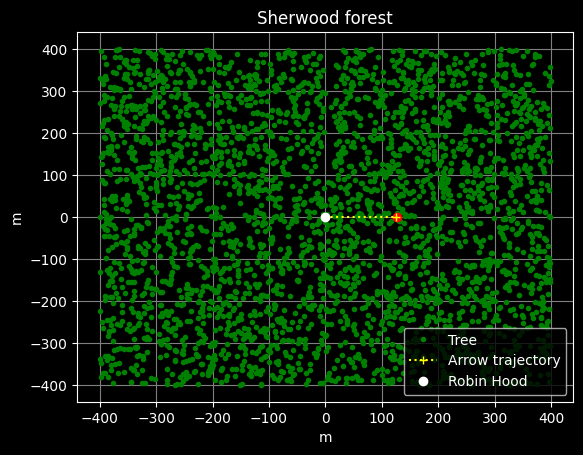

In [ ]:
ra = 1
X, Y, x, y, d = bosque_flecha(-r, r, ra, n)

print(f'La flecha impactó en el arbol con coordenadas ({x},{y}). La flecha recorrió {d}m')

plt.style.use('dark_background')

plt.plot(X,Y, '.g', label='Tree')
plt.plot(x,y, 'or')
plt.plot((0,d), (0,0), ':+', color = 'yellow', label='Arrow trajectory')
plt.plot(0,0, 'ow', label='Robin Hood')
plt.title('Proceso de Poisson Bivariado')
plt.title('Sherwood forest')
plt.xlabel('m')
plt.ylabel('m')
plt.grid(color='gray')
plt.legend()

plt.savefig('Septima_graf')
plt.show()

5. Ya que tenemos la simulación de un tiro, solo queda repetir los tiros varias veces para poder observar el comportamiento del proceso gracias al método de Monte Carlo. De manera que podamos llegar al estado estable de la simulación. Para ello es que usaremos la siguiente función.

In [ ]:
@jit(nopython = True)
def experimento(ρ, r, ra=1, n = 10**4):
  na = int(ρ*(2*r)**2)
  l = []
  for i in range(n):
    d = bosque_flecha(-r, r, ra, na)[-1]
    l.append(d)
  return l

Se establecen lo parámetros de entrada de la función.

In [ ]:
densidad = 0.005
r = 400
ra = 1
n = 10**3

Se ejecuta la función y se encuentra un intervalo de confianza para el valor esperado de la distancia recorrida por la flecha hasta el impacto.

In [ ]:
l = experimento(densidad, r, ra, n)

In [ ]:
m = np.mean(l)
ds = np.std(l, ddof=1)
z = norm.ppf(0.975)
print(f'El intervalo de confianza del 95% es [{m - z*ds/np.sqrt(n)}, {m + z*ds/np.sqrt(n)}]')

El intervalo de confianza del 95% es [92.9170714854078, 104.5464180226335]


6. Además, para poder visualizar de mejor manera los resultados del Monte Carlo, se presenta la siguiente gráfica del comportamiento de la simulación para ilustrar el estado transitorio y el estado estable de la simulación conforme el transcurso de las iteraciones.

In [ ]:
@jit(nopython = True)
def graf(l, p=1):
  ls = []
  for i in range(1,n):
    a = np.array(l[:i:p])
    ls.append(a.mean())

  return ls

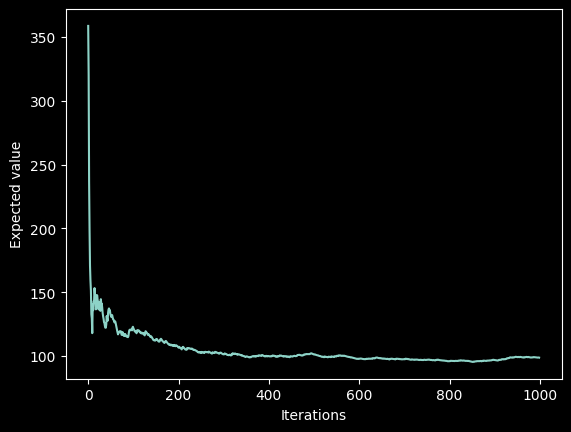

In [ ]:
ls = graf(l)

plt.plot(ls)
plt.xlabel('Iterations')
plt.ylabel('Expected value')
plt.savefig('Octava_graf') #ya recuperé la cuenta
plt.show()

7. Finalmente, repetimos el experimento varias veces para encontrar la media de medias muestrales, la cual será el valor más aproximado a la distancia media que recorrerá la flecha hasta chocar con un árbol,así como un intervalo de confianza final con un nivel de confianza del 95%.

In [ ]:
@jit(nopython = True)
def rep(ρ, r, ra, n = 10**3, n_rep = 10**2):
  l = []
  for i in range(n_rep):
    d = experimento(ρ, r, ra, n)
    D = np.array(d)
    l.append(D.mean())
  return l

In [ ]:
nr = 10**3
l = rep(densidad, r, ra, 400, nr)

In [ ]:
m = np.mean(l)
ds = np.std(l, ddof=1)
z = norm.ppf(0.975)
print(f'El intervalo de confianza del 95% es [{m - z*ds/np.sqrt(nr)}, {m + z*ds/np.sqrt(nr)}]')
print(f'E[distancia recorrida por la flecha] = {m}')


El intervalo de confianza del 95% es [96.85556327859241, 97.42568865365702]
E[distancia recorrida por la flecha] = 97.14062596612472
